# Data Visualization

The goal of this workshop is to understand how to import a new dataset, gain simple insights from the dataset, and clean + prepare the dataset

## Content

1. Understand Structure of Matplotlib Code
2. Types of Charts
- Bar Charts
- Line Charts
- Heat Maps
3. Types of Formatting
- Title/Axis Labels
- Axis Limits
- Colors
- Legends

# Section 0: Import Libraries
Recall from our last workshop in python libraries are read in like this:
```
import library_name as some_abbreviation
```

### Q0 Import pandas and matplotlib

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #main plotting library
import seaborn as sns #prettier plotting library, based on matplotlib

### Q0.1 Import "space_titanic_clean.csv"

In [139]:
df = pd.read_csv("./space_titanic_clean.csv")

# Section 1: Understand Structure of Matplotlib Code

Before we start plotting, let's first understand the general structure of a block of Matplotlib code

First, we always start by initializing our figure. The figure is sort of the "canvas" that our plot(s) will be drawn on. Typically the only parameters we pass into the figure is the `figsize`, which is a tuple, `(x, y)` where `x` is the width and `y` is the height (both in inches)

```
f = plt.figure(figsize=(x, y))
```

Next, we move to the actual drawing of our plot. This will vary depending on what type of plot we are plotting. 
```
some plot
```
After drawing, we need to add a few more things to make our plot more interpretable. While these may seem tedious, these are just best practices when it comes to creating plots for others to view. 

First, it's important to set our axis labels and title. We can do this by calling the `xlabel`, `ylabel` and `title` functions. 
```
plt.xlabel("X units")
plt.ylabel("Y units")
plt.title("Plot of Y vs. X")
```
We can set axis limits...
```
plt.xlim(min, max)
plt.ylim(min, max)
```
and limits...
```
plt.legend()
```
Lastly, it's important to actually show our plot. We can accomplish this by using the `.show()` function.
```
plt.show()
```
And there's our plot! We'll get to using these when we learn some plots.

# Types of Plots

There are many different plots, however, each plot serves a different purpose. Certain plots lend themselves more to certain datatypes (categorical, numerical). Different plots also aim to convey different insights (frequency, proportion, correlation, etc.).

While it is important to understand the code for creating each plot, prioritize having a *conceptual* understanding of each plot first. We can always find the code through online documentation, but understanding when and where to use certain plots may not always be as intuitive. 

Let's get into it!

## Histogram

The histogram is used to analyze the distribution of a single variable. Each bin represents a "category" of the data, and the y-value of the bin represents the number of occurrences, or frequency of that category. It's useful to do a quick eye-check for any outliers, mean/median, skewness, etc. 

To create a histogram, simply access the column of the variable you want to analyze, and call `.hist()`. A typical parameter for the histogram is the `bins`, and this just specifies the number of bins we want in our plot. This value will vary depending on your data and use case. 
```
df["columnName"].hist(bins=X)
```

## Bar Chart

The bar chart is typically used to visualize some categorical (x-axis) variable. While it is similar to the histogram, the bar chart can graph more than just frequency on its y-axis. Let's say you own a grocery store, and you want the total revenues for different categories of foods (fruits, vegetables, meats). A bar chart would be perfect, as the food categories would be different bars on our x-axis, and the heights (y-values) of those bars would be the total revenues. 

To create a bar chart, simply use the `.bar()` function. As parameters...
- `x` refers to the x-axis variable you would like
- `height` refers to the y-axis variable
- `color` refers to the color of your bars
- `width` refers to the width of each bar
```
plt.bar(x=df["categoricalVariable"], height=numericalVariable, color='red', width=0.8)
```

### Q1.1 Create a histogram using the `Age` column.
- Make sure to initialize your figure, x/y label, and title

<Axes: title={'center': 'Age Frequencies of Everyone on the Spaceship'}, xlabel='Age', ylabel='Frequency'>

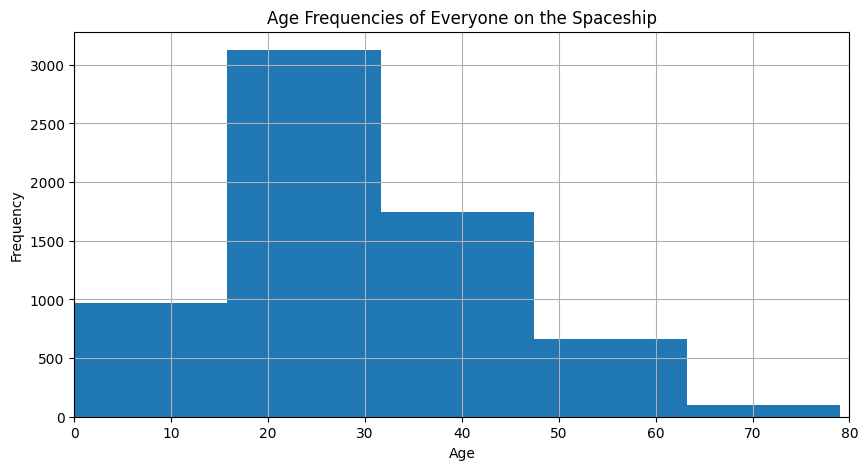

In [140]:
f = plt.figure(figsize=(10,5))
plt.title("Age Frequencies of Everyone on the Spaceship")
plt.xlabel("Age")
plt.xlim(0,80)
plt.ylabel("Frequency")
df["Age"].hist(bins=5)

### Q1.2 Create a bar chart to visualize the total amount spent on the FoodCourt based on whether a passenger was Transported or not
- Make sure to initialize your figure, x/y label, and title
- What is your x variable? What is your y variable? What methods/functions do you have to use to obtain those variables?

<BarContainer object of 2 artists>

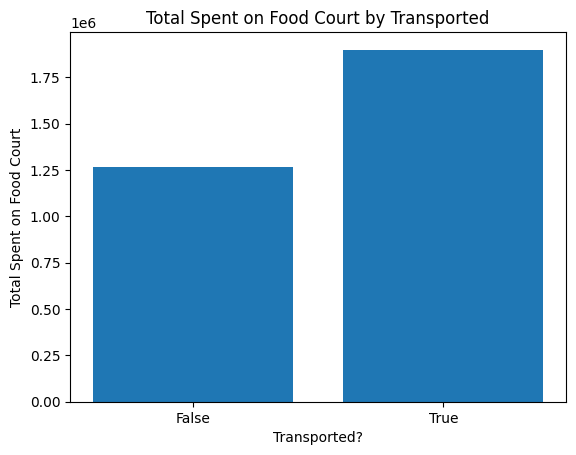

In [141]:
df_foodcourt_spending = df[ ["Transported","FoodCourt"] ].groupby("Transported").sum().reset_index()

x_values = ["False","True"]
y_values = df_foodcourt_spending["FoodCourt"]

plt.xlabel("Transported?")
plt.ylabel("Total Spent on Food Court")
plt.title("Total Spent on Food Court by Transported")

plt.bar(x_values, y_values)

## Line Plot

The line plot is typically used to show the relationship between two numerical variables. 

To create a line plot, simply use the `.plot` function. There are multiple ways to input your parameters, but the most straight forward way may be...
```
plt.plot('columnName1', 'columnName2', data=df)
```
This will plot `df['columnName1']` against `df['columnName2']`

**Note** Use line plots when each x-value has **one** y-value associated with it. For example, simply plotting `Age` versus `RoomService` won't work since there may be multiple values for `RoomService` associated with certain `Ages`. Plotting the average or total `RoomService` for each age works, since for any given age, there can only be one average or total `RoomService` value. 

## Scatter Plot

The scatter plot is similar to the line plot in that we use it to show the relationship between two numerical variables. However, one important difference is that scatter plots allow for *multiple* y-values associated with any given x-value. Thus, this makes scatter plots more commmonly used and convenient when finding relationships between numerical variables. 

To create a scatter plot, simply use the `scatter` function. The syntax is very similar to that of the line plot...
```
plt.scatter('columnName1', 'columnName2', data=df)
```
This will plot `df['columnName1']` against `df['columnName2']`



### Q1.3 Create a scatter plot comparing the amounts passengers have spent on the `ShoppingMall` vs. the `Spa`
- Make sure to initialize your figure, x/y label, and title

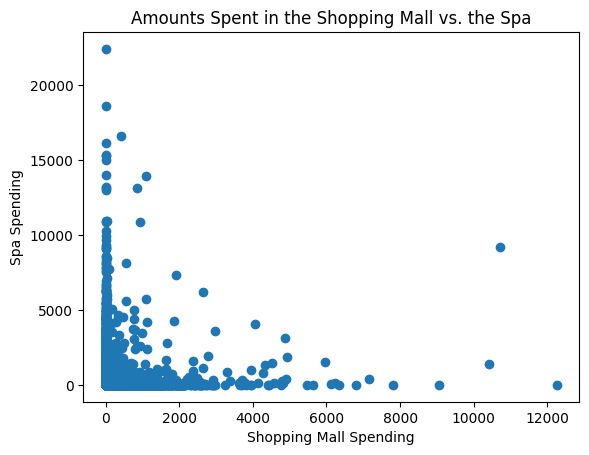

In [142]:
plt.title("Amounts Spent in the Shopping Mall vs. the Spa")
plt.xlabel("Shopping Mall Spending")
plt.ylabel("Spa Spending")

plt.scatter("ShoppingMall", "Spa", data=df[ ["ShoppingMall", "Spa"] ])

### Q1.4 Create a line plot comparing the `Age` of the passenger, and their average spending on the `VRDeck`
- Make sure to initialize your figure, x/y label, and title
- What is your x variable? What is your y variable? What methods/functions can you use to help obtain those?

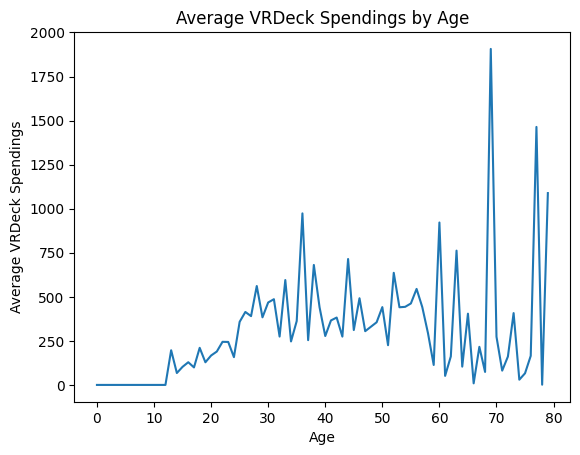

In [143]:
df_vrdeck_spending = df[ ["Age","VRDeck"] ].groupby("Age").mean().reset_index()
df_vrdeck_spending

plt.title("Average VRDeck Spendings by Age")
plt.xlabel("Age")
plt.ylabel("Average VRDeck Spendings")
plt.plot("Age", "VRDeck", data=df_vrdeck_spending)

## Pie Chart

The pie chart is typically used to show proportions of categorical variables. What are the proportions of each of the home planets in our dataset?

To create a pie chart, use the `pie` function. The parameters are...
- `x`, these are the proportion values
- `labels`, these are the labels (or values within our categorical variable) associated with each proportion
```
plt.pie(x=proportions, labels=categoricalValues)
```
Like most of the other plotting parameters, both `x` and `labels` are list-like (dataframe columns qualify!) values. `labels[0]` has proportion `x[0]`.

## Boxplot

The boxplot is really useful for analyzing relationships between a single categorical variable (x-axis) and a single numerical variable (y-axis). 

To create a boxplot, simply call `boxplot` off of your dataframe. The following parameters...
- `by` refers to the categorical variable you are plotting
- `column` refers to the numerical variable you are plotting, should put in an array

```
df.boxplot(by="categoricalColumn", column=["numericalColumn"])
```

### Q1.5 Create a pie chart for the proportion of different destinations

([<matplotlib.patches.Wedge at 0x7f6345fa5600>,
 [Text(-0.6259865613844802, 0.9045113735968358, 'TRAPPIST-1e'),
  Text(0.3346560717255464, -1.0478574872840418, '55 Cancri e'),
  Text(1.052081160564456, -0.321131175044323, 'PSO J318.5-22')])

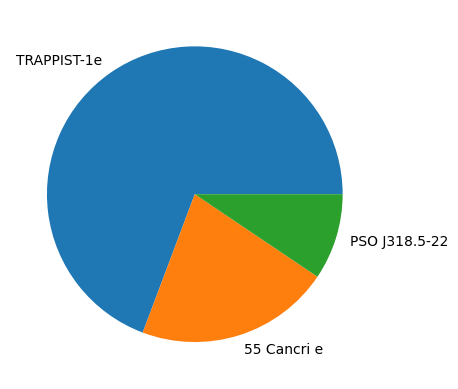

In [144]:
df_destinations = df["Destination"].value_counts()
prop = round(df_destinations/df.shape[0] * 100, 2)
plt.pie(x=prop, labels=df_destinations.index)

### Q1.6 Create a box plot comparing the `Destination` and the spending on the `RoomService`

<Axes: title={'center': 'RoomService'}, xlabel='Destination'>

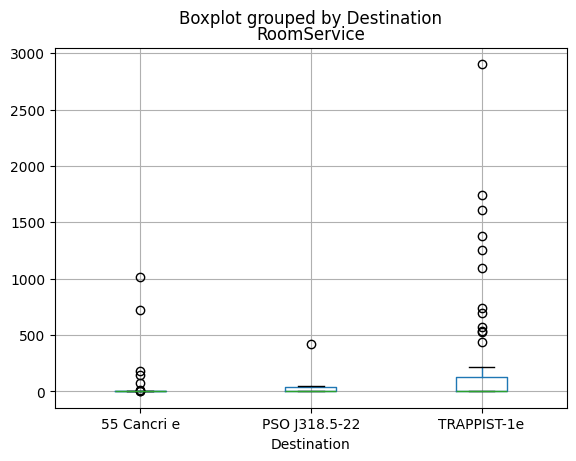

In [145]:
df.sample(100).boxplot(by="Destination",column=["RoomService"])

# Other Seaborn plots

## Pairplot

The pairplot is a really good starting plot for visualizing pairwise relationships between *numerical* variables of a dataset. The output is a grid of plots, where the ith and jth plot is the plot between the ith and jth column of the input dataset. 

To create a pairplot, the easiest way is to use the Seaborn library. We first get the subset of the columns are that are numerical. Then, we simply call `sns.pairplot` from there and pass in our subset.
```
numerical_df = df.select_dtypes(include=np.number) #get only numerical columns
sns.pairplot(numerical_df)
```

## Heat map

The heat map is also a really good starting plot for visualizing correlations between *numerical* variales of a a dataset. The output is a grid of colored squares, where the ith and jth square's color relates to the correlation between the ith and jth variable in the input dataset. 

To create a heatmap, we could use Seaborn as well. We first, similarly to pairplot, get the subset of columns that are numerical. Then, we call `sns.heatmap` from there and pass in our subset.
```
numerical_df = df.select_dtypes(include=np.number) #get only numerical columns
sns.heatmap(numerical_df)
```

## That's a wrap!
At our next workshop, we'll be moving on to modeling!